TITLE: Develop a credit card default prediction model

PROBLEM STATEMENT:


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt



In [2]:
# Load the dataset
data = pd.read_csv('/content/UCI_Credit_Card.csv')
data

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000.0,1,3,1,39,0,0,0,0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0
29996,29997,150000.0,1,3,2,43,-1,-1,-1,-1,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0
29997,29998,30000.0,1,2,2,37,4,3,2,-1,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1
29998,29999,80000.0,1,3,1,41,1,-1,0,0,...,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1


EXPLORATORY DATA ANALYSIS


In [3]:
data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [4]:
#Getting the shape of dataset with rows and columns
print(data.shape)

(30000, 25)


In [5]:
#Getting all the columns
print("Features of the dataset:")
data.columns

Features of the dataset:


Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default.payment.next.month'],
      dtype='object')

In [6]:
#check details about the data set
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

In [7]:
#print the unique value
data.nunique()

ID                            30000
LIMIT_BAL                        81
SEX                               2
EDUCATION                         7
MARRIAGE                          4
AGE                              56
PAY_0                            11
PAY_2                            11
PAY_3                            11
PAY_4                            11
PAY_5                            10
PAY_6                            10
BILL_AMT1                     22723
BILL_AMT2                     22346
BILL_AMT3                     22026
BILL_AMT4                     21548
BILL_AMT5                     21010
BILL_AMT6                     20604
PAY_AMT1                       7943
PAY_AMT2                       7899
PAY_AMT3                       7518
PAY_AMT4                       6937
PAY_AMT5                       6897
PAY_AMT6                       6939
default.payment.next.month        2
dtype: int64

In [8]:
#Looking for the description of the dataset to get insights of the data
data.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,30000.0,15000.500000,8660.398374,1.0,7500.75,15000.5,22500.25,30000.0
LIMIT_BAL,30000.0,167484.322667,129747.661567,10000.0,50000.00,140000.0,240000.00,1000000.0
SEX,30000.0,1.603733,0.489129,1.0,1.00,2.0,2.00,2.0
EDUCATION,30000.0,1.853133,0.790349,0.0,1.00,2.0,2.00,6.0
MARRIAGE,30000.0,1.551867,0.521970,0.0,1.00,2.0,2.00,3.0
AGE,30000.0,35.485500,9.217904,21.0,28.00,34.0,41.00,79.0
PAY_0,30000.0,-0.016700,1.123802,-2.0,-1.00,0.0,0.00,8.0
PAY_2,30000.0,-0.133767,1.197186,-2.0,-1.00,0.0,0.00,8.0
PAY_3,30000.0,-0.166200,1.196868,-2.0,-1.00,0.0,0.00,8.0
PAY_4,30000.0,-0.220667,1.169139,-2.0,-1.00,0.0,0.00,8.0


In [9]:
data.dtypes

ID                              int64
LIMIT_BAL                     float64
SEX                             int64
EDUCATION                       int64
MARRIAGE                        int64
AGE                             int64
PAY_0                           int64
PAY_2                           int64
PAY_3                           int64
PAY_4                           int64
PAY_5                           int64
PAY_6                           int64
BILL_AMT1                     float64
BILL_AMT2                     float64
BILL_AMT3                     float64
BILL_AMT4                     float64
BILL_AMT5                     float64
BILL_AMT6                     float64
PAY_AMT1                      float64
PAY_AMT2                      float64
PAY_AMT3                      float64
PAY_AMT4                      float64
PAY_AMT5                      float64
PAY_AMT6                      float64
default.payment.next.month      int64
dtype: object

In [10]:
#check for count of missing values in each column.

data.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
dtype: int64

<Axes: >

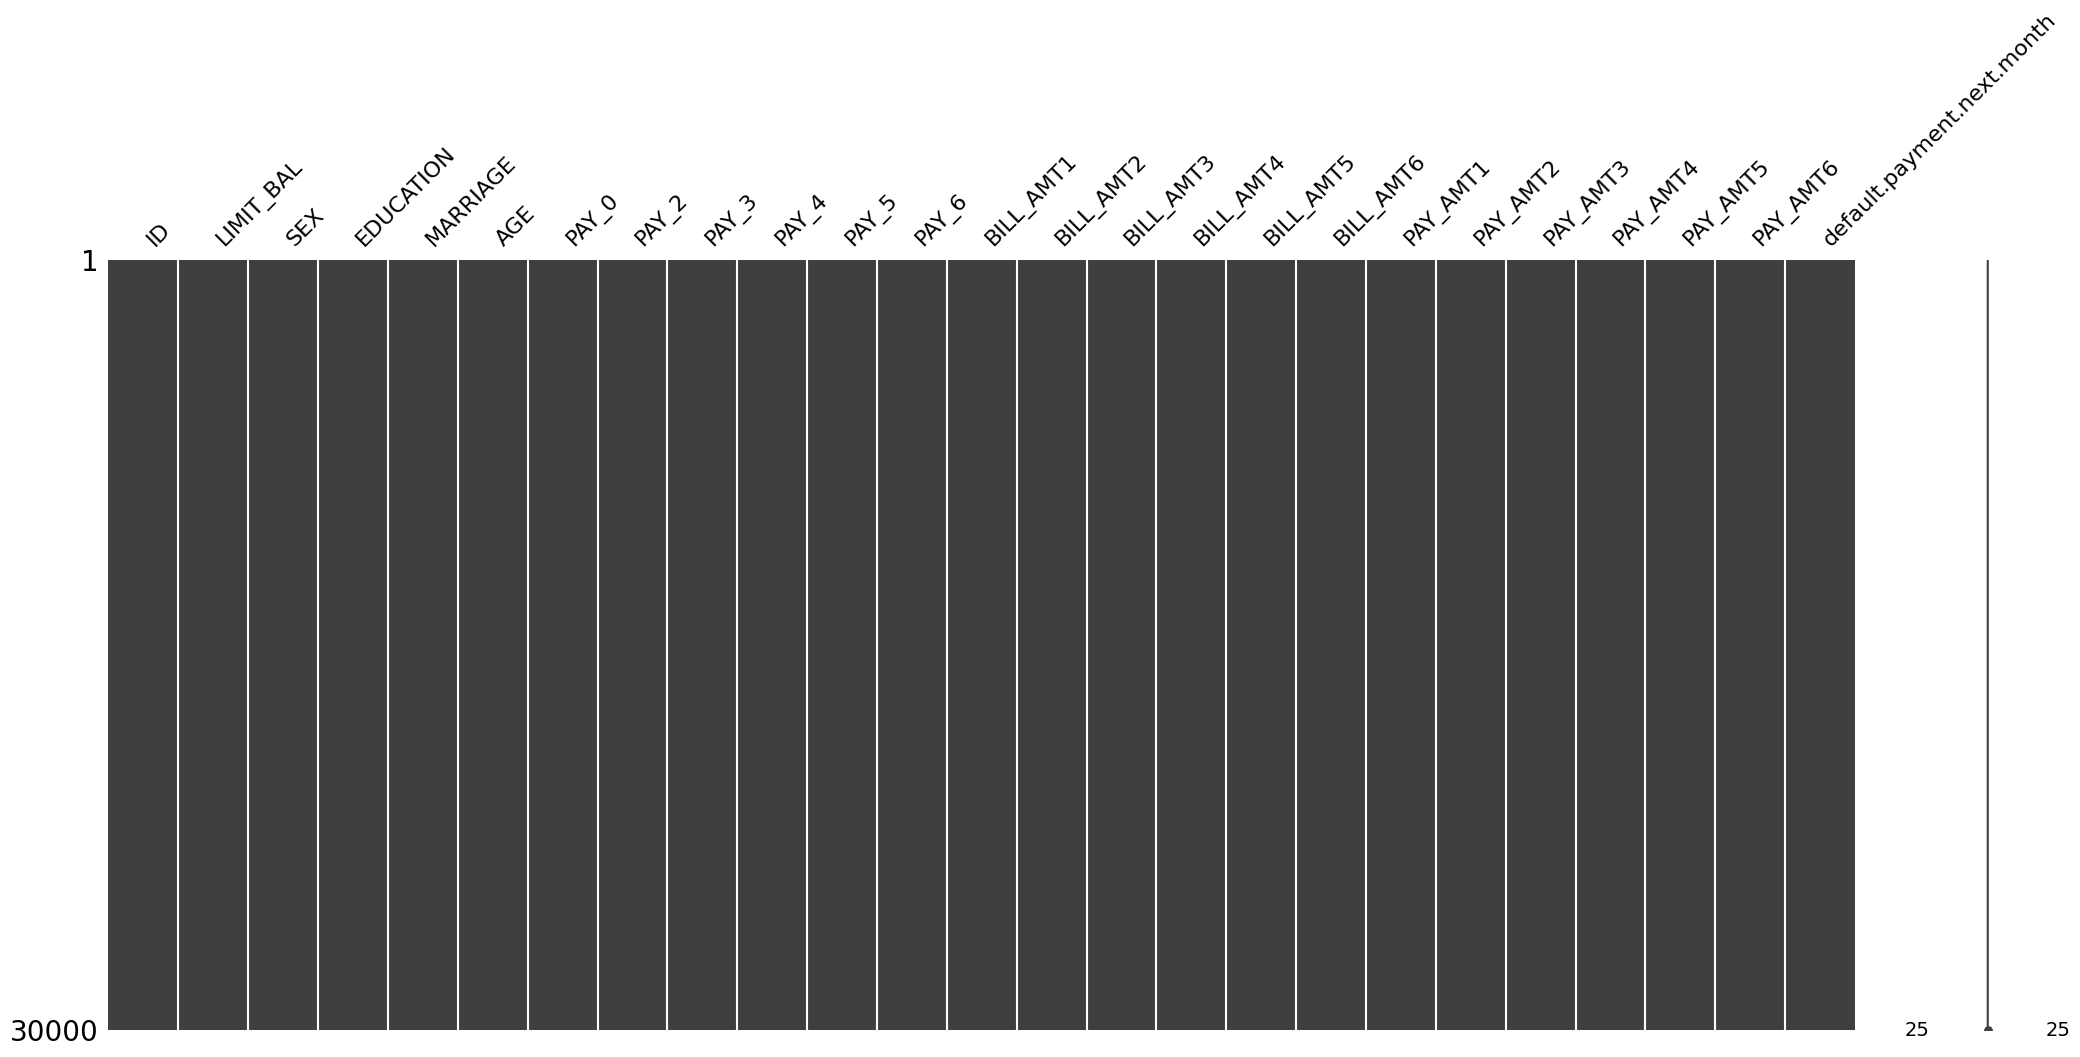

In [11]:
import missingno as msno
msno.matrix(data)

In [12]:
# Checking Duplicate Values
value=len(data[data.duplicated()])
print("The number of duplicate values in the data set is = ",value)

The number of duplicate values in the data set is =  0


FEATURE ENGINEERING

In [13]:
#data cleaning
data.rename(columns={'default.payment.next.month':'default','PAY_0':'PAY_1'},inplace=True)
data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [14]:
# counts the dependent variable data set
data['default'].value_counts()

default
0    23364
1     6636
Name: count, dtype: int64

<Axes: xlabel='default', ylabel='count'>

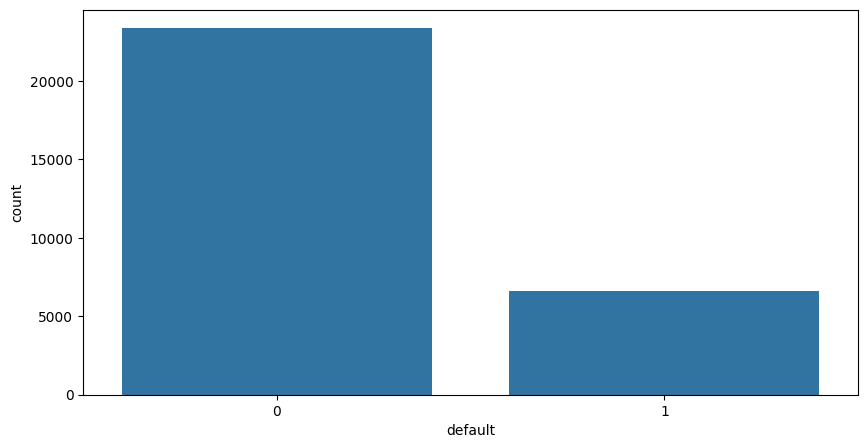

In [15]:
#plotting the count plot to vizualize the data distribution
#plot the count plot to check the data distribution
plt.figure(figsize=(10,5))
sns.countplot(x = 'default', data = data)

In [16]:
# counts the SEX variable data set
data['SEX'].value_counts()

SEX
2    18112
1    11888
Name: count, dtype: int64

<Axes: xlabel='SEX', ylabel='count'>

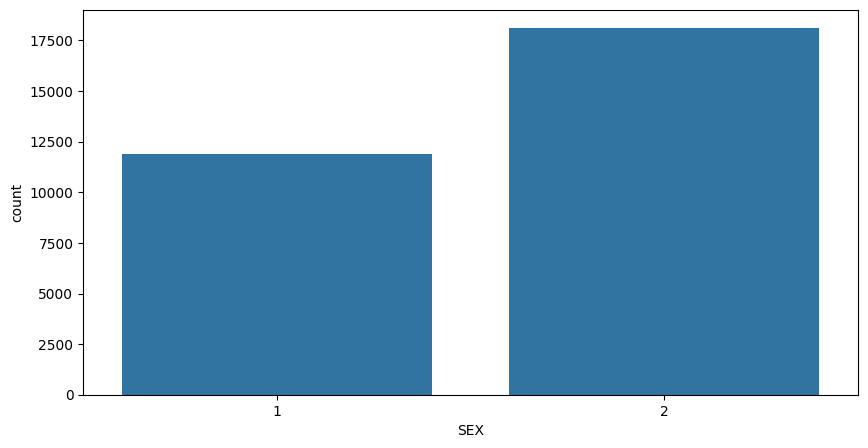

In [17]:
#plotting the count plot to vizualize the data distribution
#1= Male; 2= Female
plt.figure(figsize=(10,5))
sns.countplot(x = 'SEX', data = data)

We have few categorical features in our dataset:
1. sex
2. education
3. marraige
4. age

In [18]:
data['EDUCATION'].unique()

array([2, 1, 3, 5, 4, 6, 0])

In [19]:

# The data has been already encoded and cleaned. However, some categorical data have repeated categories. For instance, the variable ‘education’ has three categories with similar information:
# 4: others, 5: unknown, and 6: unknown
data['EDUCATION']=np.where(data['EDUCATION'] == 5, 4, data['EDUCATION'])
data['EDUCATION']=np.where(data['EDUCATION'] == 6, 4, data['EDUCATION'])
data['EDUCATION']=np.where(data['EDUCATION'] == 0, 4, data['EDUCATION'])

In [20]:
data['EDUCATION'].unique()

array([2, 1, 3, 4])

In [21]:
data['SEX'].unique()

array([2, 1])

In [22]:
data['MARRIAGE'].unique()

array([1, 2, 3, 0])

In [23]:
data['MARRIAGE']=np.where(data['MARRIAGE']==0,3,data['MARRIAGE'])
data['MARRIAGE'].unique()

array([1, 2, 3])

In [24]:
for i in ['PAY_1','PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']:
    data[i]=data[i].replace({-1:0,-2:0})
data.head()


,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,1,20000.0,2,2,1,24,2,2,0,0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,0,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,0,0,0,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [25]:
data=data.drop(['ID'],axis=1)
data

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,20000.0,2,2,1,24,2,2,0,0,0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,120000.0,2,2,2,26,0,2,0,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,90000.0,2,2,2,34,0,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,50000.0,2,2,1,37,0,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,50000.0,1,2,1,57,0,0,0,0,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000.0,1,3,1,39,0,0,0,0,0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0
29996,150000.0,1,3,2,43,0,0,0,0,0,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0
29997,30000.0,1,2,2,37,4,3,2,0,0,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1
29998,80000.0,1,3,1,41,1,0,0,0,0,...,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1


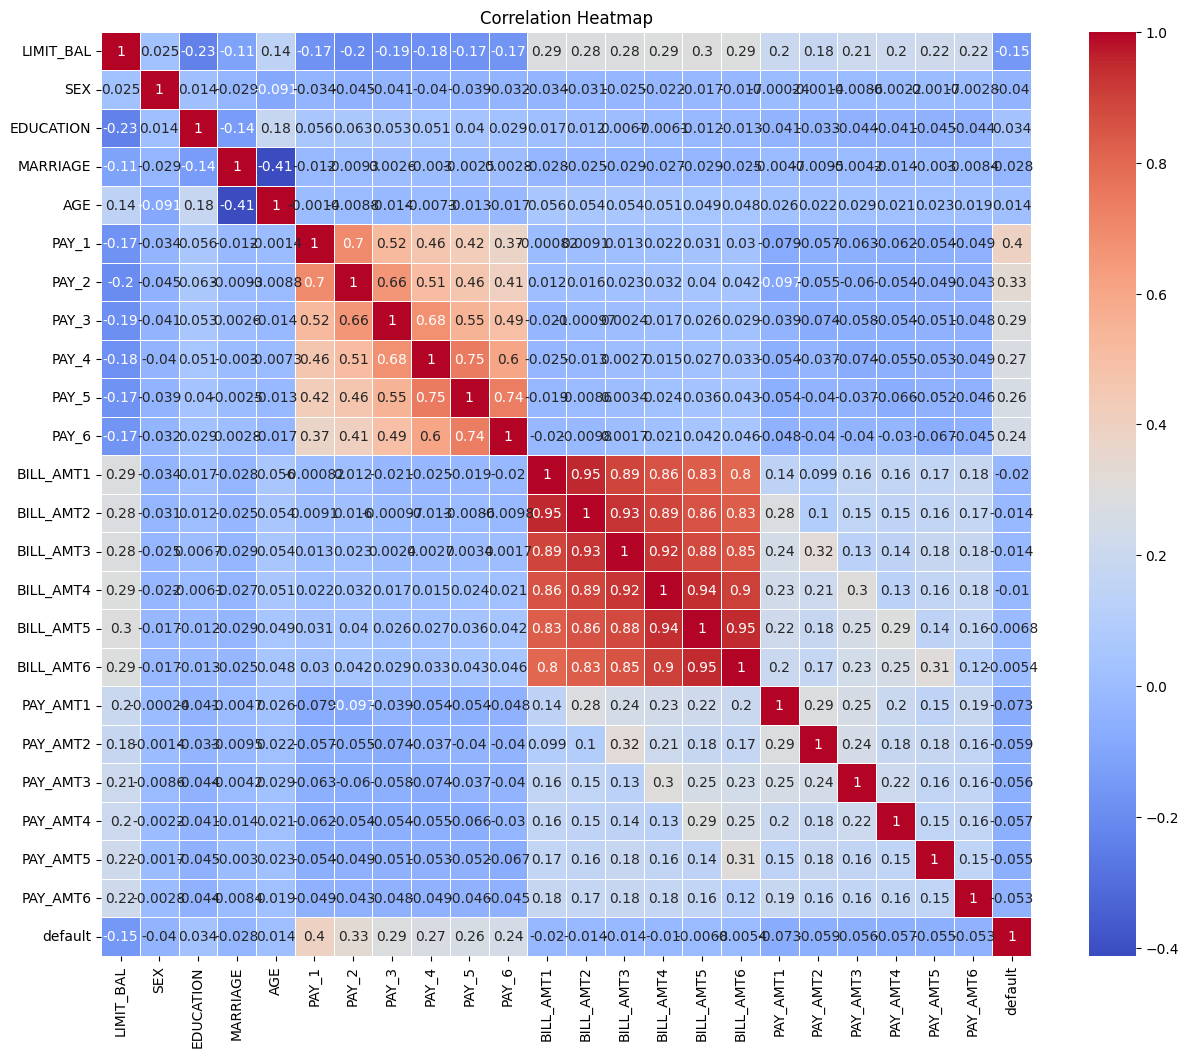

In [27]:
#feature selection
fig,ax=plt.subplots(figsize=(15,12))
df_corr=data.corr()
c_heatmap=sns.heatmap(df_corr,cmap='coolwarm',annot=True,linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [28]:
#Feature selection
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

#seperate independent and dependent variables
X=data.drop('default',axis=1)
y=data['default']
X=X.astype(int)
X=abs(X)
selected=SelectKBest(score_func=chi2,k=8)
X_new=selected.fit_transform(X,y)
selected_features=X.columns[selected.get_support()]
selected_features


Index(['LIMIT_BAL', 'BILL_AMT1', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3',
       'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6'],
      dtype='object')

In [29]:
fit=selected.fit(X,y)
dfscores=pd.DataFrame(fit.scores_)
dfcolumns=pd.DataFrame(X.columns)
featureSelected=pd.concat([dfcolumns,dfscores],axis=1)
featureSelected.columns=['features','score']
print(featureSelected.nlargest(11,'score'))

     features         score
0   LIMIT_BAL  7.106584e+07
18   PAY_AMT2  9.229476e+06
17   PAY_AMT1  7.728847e+06
19   PAY_AMT3  5.630969e+06
22   PAY_AMT6  5.141638e+06
20   PAY_AMT4  4.926667e+06
21   PAY_AMT5  4.433484e+06
11  BILL_AMT1  1.252753e+06
12  BILL_AMT2  6.367044e+05
13  BILL_AMT3  5.998673e+05
14  BILL_AMT4  2.883450e+05


In [30]:
featureSelected=featureSelected.sort_values(by='score',ascending=False)
featureSelected

,features,score
0,LIMIT_BAL,7.106584e+07
18,PAY_AMT2,9.229476e+06
17,PAY_AMT1,7.728847e+06
19,PAY_AMT3,5.630969e+06
22,PAY_AMT6,5.141638e+06
20,PAY_AMT4,4.926667e+06
21,PAY_AMT5,4.433484e+06
11,BILL_AMT1,1.252753e+06
12,BILL_AMT2,6.367044e+05
13,BILL_AMT3,5.998673e+05


<ipython-input-31-4df51a2cae6c>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='features',y='score',data=featureSelected,palette='GnBu_d')


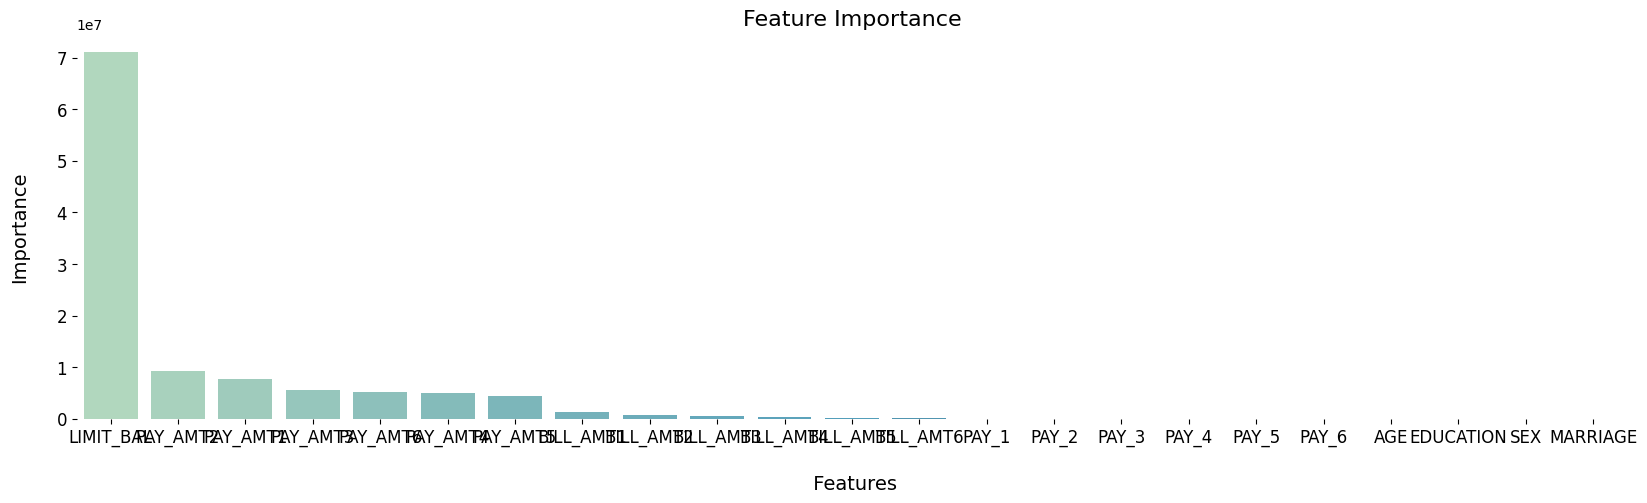

In [31]:
#Feature Selection
plt.figure(figsize=(20,5))
sns.barplot(x='features',y='score',data=featureSelected,palette='GnBu_d')
plt.box(False)
plt.title('Feature Importance',fontsize=16)
plt.xlabel('\n Features',fontsize=14)
plt.ylabel('Importance\n',fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()


In [32]:
X_new=data[featureSelected]
X_new.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [33]:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import RFE


X = data.drop('default', axis=1)
y = data['default']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features (only if needed)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

dt_model = DecisionTreeClassifier(random_state=42)

# Initialize RFE for Decision Tree and select a specific number of features
dt_rfe = RFE(dt_model, n_features_to_select=10)  # Select 8 features

dt_rfe.fit(X_train, y_train)

# Get the selected features
selected_features_dt = X.columns[dt_rfe.support_]

print("Selected Features using Decision Tree RFE:")
print(selected_features_dt)

Selected Features using Decision Tree RFE:
Index(['LIMIT_BAL', 'AGE', 'PAY_1', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT4',
       'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT6'],
      dtype='object')


In [34]:
# models and performance metrics
# dt,rf,lr



import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Load your dataset
# data = pd.read_csv('credit_card_default_dataset.csv')

# Data preprocessing
X = data.drop('default', axis=1)
y = data['default']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize and train multiple models
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'SVM': SVC(probability=True)
}

results = {}

for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_prob)

    results[model_name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'AUC': auc
    }

# Print and compare model performance
for model_name, metrics in results.items():
    print(f'{model_name} Metrics:')
    for metric_name, value in metrics.items():
        print(f'{metric_name}: {value:.4f}')
    print('---------------------------')


Logistic Regression Metrics:
Accuracy: 0.8160
Precision: 0.6661
Recall: 0.3191
F1 Score: 0.4315
AUC: 0.7622
---------------------------
Random Forest Metrics:
Accuracy: 0.8152
Precision: 0.6382
Recall: 0.3587
F1 Score: 0.4593
AUC: 0.7618
---------------------------
Decision Tree Metrics:
Accuracy: 0.7227
Precision: 0.3765
Recall: 0.4075
F1 Score: 0.3914
AUC: 0.6096
---------------------------
SVM Metrics:
Accuracy: 0.8183
Precision: 0.6586
Recall: 0.3526
F1 Score: 0.4593
AUC: 0.7113
---------------------------


In [38]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score

# Assuming you have loaded your dataset into a DataFrame 'df' and split it into features (X) and the target variable (y)

# Standardize the features (if needed)
# scaler = StandardScaler()
# X = scaler.fit_transform(X)

X = data.drop('default', axis=1)
y = data['default']


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Create and train the K-Nearest Neighbors model
knn = KNeighborsClassifier(n_neighbors=100)
knn.fit(X_train, y_train)

# Predict probabilities for both training and testing data
y_train_preds = knn.predict_proba(X_train)[:, 1]
y_test_preds = knn.predict_proba(X_test)[:, 1]

# Define a threshold for classification (e.g., 0.5)
thresh = 0.5

# Function to print classification metrics
def print_report(y_true, y_pred, threshold):
    y_pred_class = [1 if p >= threshold else 0 for p in y_pred]
    accuracy = accuracy_score(y_true, y_pred_class)
    precision = precision_score(y_true, y_pred_class)
    recall = recall_score(y_true, y_pred_class)
    auc = roc_auc_score(y_true, y_pred)
    return auc, accuracy, recall, precision

# Evaluate the KNN model on training data
print("KNN Model Evaluation on Training Data:")
knn_train_auc, knn_train_accuracy, knn_train_recall, knn_train_precision = print_report(y_train, y_train_preds, thresh)
print("AUC:", knn_train_auc)
print("Accuracy:", knn_train_accuracy)
print("Recall:", knn_train_recall)
print("Precision:", knn_train_precision)

# Evaluate the KNN model on testing data
print("KNN Model Evaluation on Testing Data:")
knn_test_auc, knn_test_accuracy, knn_test_recall, knn_test_precision = print_report(y_test, y_test_preds, thresh)
print("AUC:", knn_test_auc)
print("Accuracy:", knn_test_accuracy)
print("Recall:", knn_test_recall)
print("Precision:", knn_test_precision)


KNN Model Evaluation on Training Data:
AUC: 0.6841027938681664
Accuracy: 0.7807083333333333
Recall: 0.060685521633264655
Precision: 0.5664335664335665
KNN Model Evaluation on Testing Data:
AUC: 0.6675145099233727
Accuracy: 0.7835
Recall: 0.06399383191981496
Precision: 0.49404761904761907


In [41]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Split the data into features (X) and the target variable (y)
X = data.drop('default', axis=1)
y = data['default']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features (only for models that require it)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 1. Logistic Regression
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)
logistic_predictions = logistic_model.predict(X_test)

# 2. Random Forest Classifier
random_forest_model = RandomForestClassifier()
random_forest_model.fit(X_train, y_train)
random_forest_predictions = random_forest_model.predict(X_test)

# 3. Gradient Boosting (XGBoost)
xgboost_model = XGBClassifier()
xgboost_model.fit(X_train, y_train)
xgboost_predictions = xgboost_model.predict(X_test)

# Evaluate the models
logistic_accuracy = accuracy_score(y_test, logistic_predictions)
random_forest_accuracy = accuracy_score(y_test, random_forest_predictions)
xgboost_accuracy = accuracy_score(y_test, xgboost_predictions)

print("Logistic Regression Accuracy:", logistic_accuracy)
print("Random Forest Accuracy:", random_forest_accuracy)
print("XGBoost Accuracy:", xgboost_accuracy)

Logistic Regression Accuracy: 0.816
Random Forest Accuracy: 0.811
XGBoost Accuracy: 0.816


In [43]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Create and train the Logistic Regression model
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)
logistic_predictions = logistic_model.predict(X_test)

# Evaluate the Logistic Regression model
logistic_accuracy = accuracy_score(y_test, logistic_predictions)
logistic_precision = precision_score(y_test, logistic_predictions)
logistic_recall = recall_score(y_test, logistic_predictions)
logistic_f1 = f1_score(y_test, logistic_predictions)

# Display the metrics
print("Logistic Regression Accuracy:", logistic_accuracy)
print("Logistic Regression Precision:", logistic_precision)
print("Logistic Regression Recall:", logistic_recall)
print("Logistic Regression F1 Score:", logistic_f1)


Logistic Regression Accuracy: 0.816
Logistic Regression Precision: 0.6661367249602543
Logistic Regression Recall: 0.31911652703731913
Logistic Regression F1 Score: 0.43151390319258504


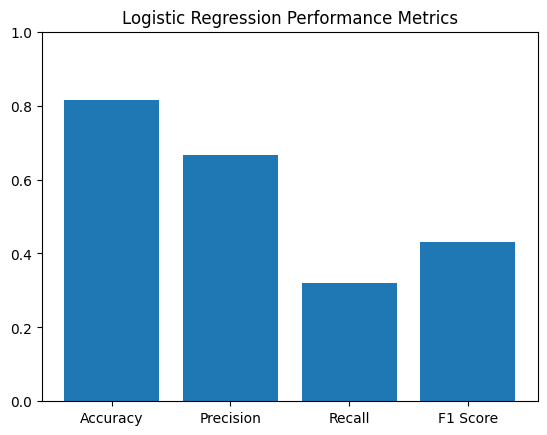

In [44]:
import matplotlib.pyplot as plt

# Assuming you have already evaluated the Logistic Regression model as mentioned in the previous response

metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
logistic_scores = [logistic_accuracy, logistic_precision, logistic_recall, logistic_f1]

plt.bar(metrics, logistic_scores)
plt.title('Logistic Regression Performance Metrics')
plt.ylim([0, 1])
plt.show()


Accuracy: 0.81
Precision: 0.62
Recall: 0.36
F1 Score: 0.45
ROC AUC Score: 0.65


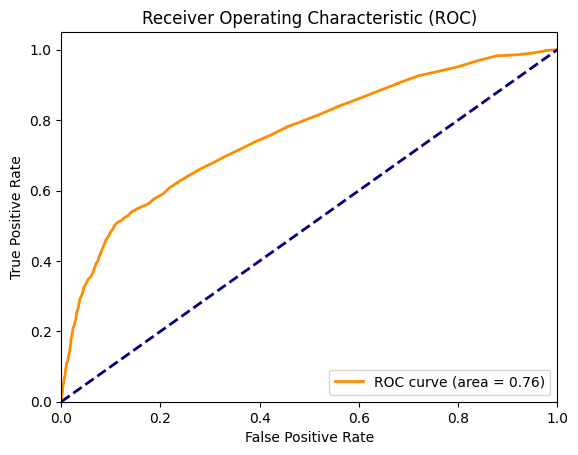

In [48]:
# performance metrics
#PERFORMNCE METRICS

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc


# Extract features and target variable
X = data.drop(['default'], axis=1)  # Features (excluding ID and the target)
y = data['default']  # Target variable

# Split the dataset into a training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize and train the model (for example, Random Forest Classifier)
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')
print(f'ROC AUC Score: {roc_auc:.2f}')

# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()
